## Solving the Eigenvalue Problem in the One-Dimensional Schrödinger Equation Using the Numerov Algorithm

#### Acknowledgment
Before starting, I would like to acknowledge and thank my course mate and study partner, Adrian Tee Kai En, for his valuable contributions to the ideas discussed in this assignment. All the coding and implementation here are **my own work**, but our discussions greatly enhanced my understanding of the problem.



## Introduction to the Time-Independent Schrödinger Equation bound-state problems

When solving the Schrödinger equation, bound-state problems often involve complex potentials that cannot be solved analytically. In such cases, numerical methods become essential for finding approximate solutions to the equation.

In the following section, we are going to to apply numerical methods such as the numerov method to solve the eigenvalue problem defined through one dimensional Schrodinger Equation. 

The one-dimensional Time-Independent Schrodinger Equation (TISE) for a particle in a potential $V(x)$ is given by:

$$-\frac{\hbar^2}{2m} \frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x)$$

where 
- $\hbar$ is the Planck's constant
- $m$ is the mass of the particle
- $\psi(x)$ is the wavefunction 
- $V(x)$ is the potential
- $E$ is the energy level.

Rearranging, we can express the TISE as: 
$$\left[\frac{d^2}{dx^2}-\frac{2m}{\hbar^2}V(x)\right]\psi(x)=-\frac{2m}{\hbar^2}E\psi(x)$$

This is a example of an **eigenvalue problem** over a continuous domain. It is a second order ordinary differential equation where the first order term does not appear. To solve this eigenvalue problem, we can apply the **Numerov Method**.

## Numerov Method 

Numerov method is a numerical technique designed to solve second-order ordinary differential equations (ODEs) of the form:
$$y''(x) = -g(x)y(x)\;\;\;\;\;\;\;\;\;\ x\subset[a,b]$$ 
where the first-order derivative term $y'(x)$ does not explicitly appear (i.e., it is implicit). 


We can rewrite the TISE in this form:
$$\psi''(x)=-k(x)\psi(x)$$ 
where $k= \sqrt{\frac{2m}{\hbar^2}[E-V(x)]}$

To derive the Numerov Method, we first have to discretize the interval $[a,b]$ using equally spaced step size, $h$. 

Then, we can proceed with the Taylor expansion of the function $\psi(x)$ around the point $x_i$

$$\psi_{i+1}=\psi_i + h \psi'_i + \frac{h^2}{2!}\psi''_i + \frac{h^3}{3!}\psi'''_i +\frac{h^4}{4!}\psi''''_i + \frac{h^5}{5!}\psi'''''_i + ...  \;\;\;\;\;\;\;\; (1)$$

Similarly, we have 
$$\psi_{i-1}=\psi_i - h \psi'_i + \frac{h^2}{2!}\psi''_i - \frac{h^3}{3!}\psi'''_i +\frac{h^4}{4!}\psi''''_i - \frac{h^5}{5!}\psi'''''_i + ... \;\;\;\;\;\;\;\; (2)$$


Summing (1) and (2), we have

$$\psi_{i+1}-2\psi_i+\psi_{i-1}=h^2\psi''_i + \frac{h^4}{12}\psi''''_i + O(h^6)\;\;\;\;\;\;\;\;\;\;\; (3)$$    

Remember that we only interested in expressing the $\psi''_{i}$ with only $\psi_{i}$, $\psi_{i+1}$ and $\psi_{i-1}$ terms, thus, we have to expressed the $\psi''''_{i}$ in those terms:

Differenciate $\psi''_{i}$ twice, we get: 
$$\psi''''_{i} = [-k(x)\psi''(x)]''$$

Let $$z = -k(x)\psi''(x)$$



Using three point difference, $\psi''''_i$ can be expressed as:

$$\psi''''(x) = \frac{z_{i+1}-2z_i+z_{i-1}}{h
^2} \;\;\;\;\;\;\;\;\;\;\;\; (4) $$   

Substitute (4) into (3), we get:
$$ \psi_{i+1}-2\psi_i+\psi_{i-1}=h^2\psi''_i + \frac{h^2}{12}[k_{i+1}\psi_{i+1}-2k_i\psi_i+k_{i-1}\psi_{i-1}]  \;\;\;\;\;\;\;\;\ (5)$$  

Rearrange for $\psi_{i+1}$:

$$ \psi_{i+1} = \frac{2\psi_i[1-\frac{5h^2}{12}k_i]- \psi_{i-1}[1+\frac{h^2}{12}k_{i-1}]}{1+\frac{h^2}{12}k_{i+1}} \;\;\;\;\;\; (6) $$



Similarly for $\psi_{i-1}$:

$$ \psi_{i-1} = \frac{2\psi_i[1-\frac{5h^2}{12}k_i]- \psi_{i+1}[1+\frac{h^2}{12}k_{i+1}]}{1+\frac{h^2}{12}k_{i-1}} \;\;\;\;\;\; (7)$$

Eq(6) and eq(7) are the same thing where you can find the next point given the previous two points. One can integrate from the left using the eq(6), and integrate from the right using eq(7).

## Numerically solving the TISE eigenvalue problem.


In [29]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve 

Let's try solving the time-independent Schrodinger equation with the following potential $V(x)$:

$$V(x) = \frac{\hbar^2}{2m} \alpha^2 \lambda(\lambda -1)\left[ \frac{1}{2}-\frac{1}{\cosh(\alpha x)^2} \right] $$

Given the values of $\alpha = 1$ and $\lambda = 4$, and use $\hbar = m = 1$ for convenience, we are interested to find the energy eigenvalue of the bound particles in the potential well numerically. 

Let's plot the potential to see what it looks like:

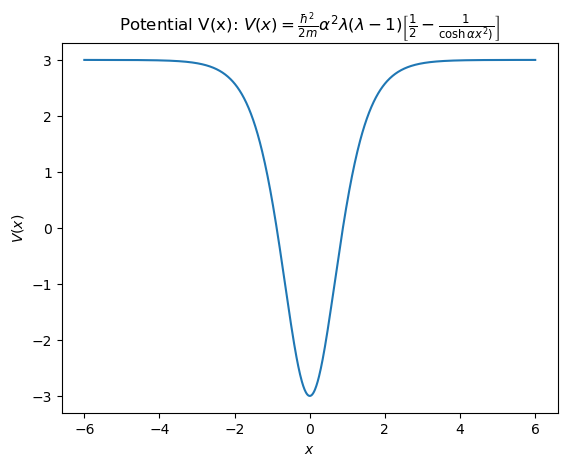

In [30]:
# Given parameters 
hbar, m, alpha = 1 , 1 , 1
ambda = 4 

# Plot the potential graph
x = np.linspace (-6,6,1000)
def V(x) :
    return hbar**2/(2*m) * alpha**2 * ambda * (ambda-1) *((1/2) - 1/np.cosh(alpha*x)**2)
plt.plot(x,V(x))
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.title(r'Potential V(x): $V(x)= \frac{\hbar^2}{2m} \alpha^2 \lambda (\lambda-1) \left[\frac{1}{2} - \frac{1}{\cosh{\alpha x}^2)}\right]$')
plt.show()

This is the potential well where we aim to find the energy eigenvalues of the time-independent Schrodinger equation (TISE) that are bound within it. 

Next, let's define the function $k$ which depends on $x$ and energy, $E$ . 

In [27]:
def k(x,E):
    return ((2*m)/hbar**2) * (E-V(x))

#### Integration from both sides using Numerov Method
The wavefunction $\psi(x)$ must vanish as $|x|->\infty$. Numerical errors can occur when integrate from one side due to the wavefunction's transition from an exponentially small region (outside the well) to an oscillatory region (within the well). 

To address this issue, the Schrodinger equation is integrated from both the left and right sides using the Numerov algorithm. If the integration from both sides matched at some turning point, that energy is an eigenvalue.

Equation (6) will be used for integration from the left, while equation (7) will be used for integration from the right:

In [44]:
b1, b2 = -10, 3  # Start and end point for integration fron left
c1, c2 = -3, 10   # Start and end point for integration fron right
N = 10000         
h = (b2 - b1)/(N-1) # Step size

# Integration from left 
def numerov(b1,E):
    x = np.linspace(b1,b2,N)
    k1 = k(x,E)  # Put as constant to reduce runtime
    psi_d = 0      # \psi_{i-1}
    psi = 1e-10    # \psi_{i}
    psi_value = [psi_d,psi]
    for i in range (N-2):
        psi_i = (2*psi*(1-((5*h**2)/12) * k1[i]) - psi_d * (1+ (h**2/12) * k1[i-1]))/(1 + h**2/12 *k1[i+1])
        psi_d = psi
        psi = psi_i
        psi_value.append(psi)
    return x, psi_value

# Integration from right 
def voremun(x1,E):
    x1 = np.linspace(c2,c1,N)
    k2 = k(x1,E)
    psi1_i = 0  # \psi_{i+1}
    psi1 = 1e-10      # \psi_{i}
    psi1_values = [psi1, psi1_i]
    for i in range (N-2):
        psi1_d = (2*psi1*(1-(5*h**2)/12 * k2[i]) - psi1_i * (1+ h**2/12 * k2[i+1]))/(1 + h**2/12 *k2[i-1])
        psi1_i = psi1
        psi1 = psi1_d 
        psi1_values.append(psi1)
    return x1, psi1_values

What does this mean? Let's plot the graph using some random number for energy, E and visualise it. 

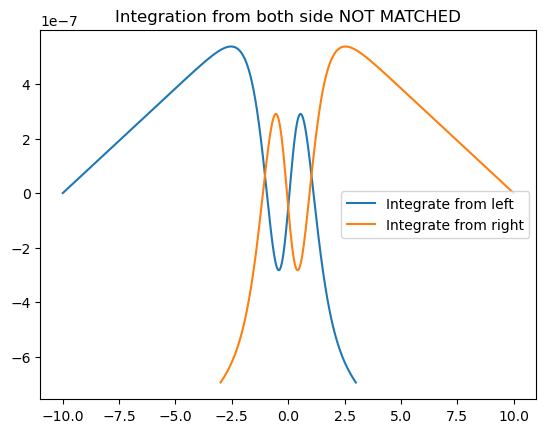

In [66]:
E = 3  # Guess
x2, psi2 = numerov(b1,E)
x3, psi3 = voremun(c2,E)
plt.plot(x2,psi2,label='Integrate from left')
plt.plot(x3,psi3,label='Integrate from right')
plt.title('Integration from both side NOT MATCHED')
plt.legend()
plt.show()

Since we can see that **integration from both side does not match**, we can conclude that E = 3 is not a solution and thus **3 is not an eigenvalue**. 

Now, let's try for another value of E. Say E = 2.5,

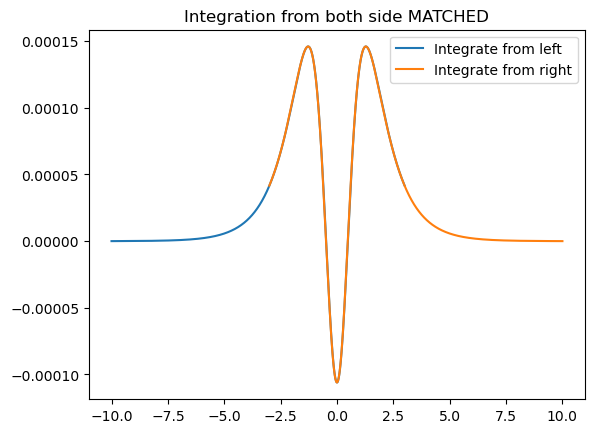

In [63]:
E = 2.5 # Guess
x4, psi4 = numerov(b1,E)
x5, psi5 = voremun(c2,E)
plt.plot(x4,psi4,label='Integrate from left')
plt.plot(x5,psi5,label='Integrate from right')
plt.title('Integration from both side MATCHED')
plt.legend()
plt.show()

If the integration from both side matched at turning points like the graph above, then we can say that the energy, E = 2.5 is a solution and **2.5 is an eigenvalue** of the TISE. 

#### Turning point 

Turning point is the point where the particle's energy intersects with the potential, i.e., $E = V(x)$. It depends on energy $E$, where the position of turning point varies for different E. To locate the turning points, a root finding algorithm can be used to solve for $k(x,E)$. Here, we use `fsolve` from `scipy.optimize` to find the root.

We define a range of $E$ values where the bound states are likely to exist: 

In [67]:
# Energy range 
E_range = np.linspace(-2.9,2.9,10)

# Turning point (tp) function
def tp(E):
    return fsolve (k,-1,args=(E))[0] # E kept constant

#### Boundary conditions 


For a particle in potential well, the boundary conditions must ensure that the wavefunction $\psi(x)$ is continuous and square integrable at the boundary . The two boundary conditions are :
$$\psi_l(x_r)=\psi_r(x_r)$$
$$\psi_l'(x_r)=\psi_r'(x_r)$$
where $\psi_l$ is the integration from left, $\psi_r$ is the integration from right and $x_r$ is the turning point.

Combining these two conditions, we have 
$$\frac{\psi_l'(x_r)}{\psi_l(x_r)}=\frac{\psi_r'(x_r)}{\psi_r(x_r)}$$

Three point formula for the first-order:
$$\psi'(x)=\frac{\psi(x+h)-\psi(x-h)}{2h}$$

Using the three point formula for the first-order, the combined boundary conditions become:
$$f(E)=\frac{\psi_l(x_r+h)-\psi_l(x_r-h)}{2h\psi_l(x_r)}-\frac{\psi_r(x_r+h)-\psi_r(x_r-h)}{2h\psi_r(x_r)}=0 \;\;\;\;\;\;\;\;\;\; (8)$$


In [68]:
# Solve for boundary conditions

def sol(E):   # f(E)
    tp_value = tp(E)  
    psil = numerov(b1,E)[1]
    psir = voremun(b2,E)[1]

    # Find the position of the turning point (ptp) in the x-values 
    ptp1 = (round((tp_value - b1)/h))  # position of the turning point from left
    ptp2 = (round((c2 - tp_value)/h))  # position of the same turning point from right

    # Eq (8), the boundary conditions
    return ((psil[ptp1+1]-psil[ptp1-1])/(psil[ptp1]))-((psir[ptp2-1]-psir[ptp2+1])/(psir[ptp2]))

Any energy value that satisfies equation (8) is an eigenvalue of the Schrodinger equation, which is our ultimate goal. To achieve this, we can use `fsolve` again to solve for the root, which will give us the energy eigenvalue.   

In [71]:
# Find all eigenvalues
eig=[]  # A list to store all eigenvalues

for i in range(len(E_range)-1):
    root = fsolve(sol, E_range[i])  # Solve for each energy in the E_range
    rounded_root = round(root[0],2)
    if rounded_root not in eig:   # Exclude those duplicated ones
        eig.append(rounded_root)

# Print all the eigenvalues.
print(f'The eigenvalues are {eig}')

The eigenvalues are [-1.5, 1.0, 2.5]


Those are the energy eigenvalues found numerically. Now, let's compare them with the analytical solution for energy eigenvalue $E_n$:

$$E_n = \frac{\hbar^2}{2m}\alpha^2\left[ \frac{\lambda(\lambda-1)}{2}-(\lambda-1-n)^2\right]$$
With values of $\alpha=1,\lambda=4, \hbar=m=1$, the expression simplifies to:
$$E_n = \frac{1}{2}[6-(3-n)^2]$$

For $n=0,1,2,3,...$
$$E_0=-1.5, \;\;\;
E_2 = 1.0, \;\;\;
E_3 = 2.5$$

The analytical solution for energy eigenvalue matches exactly with the numerically obtained values! The code works!

Finally, let's plot the wavefunctions with these eigenvalues. 

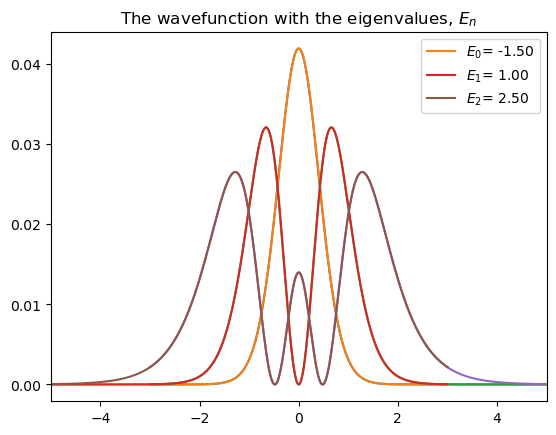

In [76]:
for j in range(len(eig)):
    xl, psil = numerov(b1, eig[j])  # Left wavefunction for the current eigenvalue
    xr, psir = voremun(c2, eig[j])  # Right wavefunction for the current eigenvalue
    
    #Plot the squared wavefunctions for each eigenvalue
    plt.plot(xr, np.array(psir)**2/np.linalg.norm(np.array(psir)**2))
    plt.plot(xl, np.array(psil)**2/np.linalg.norm(np.array(psil)**2), label=f"$E_{j}$= {eig[j]:.2f}")

plt.xlim(-5,5)
plt.title('The wavefunction with the eigenvalues, $E_n$')
plt.legend()
plt.show()